# `dgcv` Basics: An Introduction to the Differential Geometry with Complex Variables Package
###### ----by David Sykes----

`dgcv` is an open-source Python package providing basic tools for differential geometry integrated with systematic organization of structures accompanying complex variables, in short, Differential Geometry with Complex Variables.

The package is hosted on the Python Package Index here:
> https://pypi.org/project/dgcv/

and further documentation is available here:
> https://www.realandimaginary.com/dgcv/

This guide introduces basics needed to get started with `dgcv`. It is organized into (mostly) modular sections, so jump directly to topics of interest. Topics covered include:

- Installing `dgcv` and importing it into a Jupyter notebook
- Creating coordinates, understanding variable types, and working with the `dgcv` Variable Management Framework (*VMF*)
- Vector fields and differential forms
- Finite-dimensional algebras
- Tensor fields
- Polynomials
- Coordinate transformations
- Structure-specific tools (showing a selection of functions specialized for Riemannian, Kähler, and CR geometry)

###### Updated versions of this interactive manual will become available as `dgcv` develops.

# Installing `dgcv` and importing it into a Jupyter notebook

#### Installing from PyPI

The `dgcv` package has been uploaded to PyPI, and can be installed using python's `pip` module:

```bash
pip install dgcv
```
See [online instructions (realandimaginary.com/dgcv/getting_started/installing_dgcv/)](https://www.realandimaginary.com/dgcv/getting_started/installing_dgcv/) for more details.

#### Importing `dgcv` in a Jupyter notebook

Once the package is installed, import it into your Jupyter notebook as follows:

In [1]:
from dgcv import *      # this imports the full standard dgcv library
from sympy import I, simplify, re, im, conjugate    # These sympy functions are typically useful with dgcv,  
                                                    # and we'll use them in this tutorial

The command `from dgcv import *` makes the core library of `dgcv` available in the notebook. Be sure to run this import (or a similar import) whenever a notebook is newly opened.

`dgcv` provides several tools for formatting notebook output cleanly. The main one is `set_dgcv_settings(format_displays=True)`, which applies $\LaTeX$ formatting to displayed mathematical objects.

A technical note: this command invokes `sympy.init_printing()` under the hood, so all SymPy objects will display using $\LaTeX$ as well. However, it also applies additional formatting specific to `dgcv` objects — features not included in `sympy.init_printing()` alone.

In [2]:
set_dgcv_settings(format_displays=True, theme='blue')   # this settings command accepts many keywords

A tip for getting started with `dgcv`, most functions in the library have helpful docstring documentation. Use `help` to retrieve any function's docstring. Making complete docstrings for all of `dgcv` is a work in progress, but most are generally useful.

In [3]:
help(annihilator) # an example of calling up the docstring for the `annihilator` function.

Help on function annihilator in module dgcv.vector_fields_and_differential_forms:

annihilator(
    objList,
    coordinate_Space,
    control_distribution=None,
    _pass_error_report=None,
    allow_div_by_zero=False
)
    Finds annihilators for a given list of vector fields or differential forms.

    This function computes objects that "annihilate" the provided list of vector fields or differential forms.
    An annihilator is either the span of differential forms that evaluate to zero on each vector field in the list,
    or vector fields whose interior product annihilates each differential form in the list. `annihilator` dynamically
    handles both real and holomorphic coordinate systems and can convert between them as needed. Additionally,
    solutions can be constrained to a given control distribution by using the `control_distribution` keyword.

    Parameters
    ----------
    objList : list of VFClass or DFClass
        A list of vector fields or differential forms for wh

# Creating variables, understanding their types, and working with the `dgcv` variable management framework

Most *variables* in `dgcv` are just sympy.symbols objects, but to fully leverage `dgcv`'s features, we need to register labeled variables within the `dgcv` Variable Management Framework (*VMF*). Think of it as declaring a set of variables to be coordinate functions in a coordinate system.

The `dgcv` function `createVariables` makes the process of initializing variables within the VMF easy. It uses flexible syntax, and can initialize several types of coordinate systems. Here are several examples of how to use `createVariables` to create variable systems with different properties.

Ex.1. Initialize a variable system with a single variable *of standard type* labeled $\alpha$: 

In [4]:
createVariables('alpha')    # This initialized a sympy.symbols object labeled "alpha" AND registered it in the VMF
                            # It is as if we had run `alpha = symbols('alpha')` using sympy.symbols, but it 
                            # additionaly performed important tasks withing DGCV's VMF, which we will see later on.

Ex.2. Initialize 3 variable systems each with a single variable *of standard type*, labeled $a$, $b$, and $c$: 

In [5]:
createVariables('a  b,    c')   # This is written with intentionally sloppy/inconsistent formatting to emphasize
                                # `createVariables` flexibility. This line initialized 3 variables "a", "b", and "c"  
                                # registered in the VMF as "standard type".

Ex.3. Initialize a single variable system *of standard type* consisting of the coordinate tuple $r=(r_1, r_2, r_3)$:

In [6]:
createVariables('r', 3) # This initializes a variable system consisting of the tuple `r=(r1, r2, r3)` registered in the
                        # VMF again as a "standard variable system". Objects labeled "r1", "r2", and "r3" are
                        # sympy.symbols type.

Ex.4. Initialize a single variable system *of standard type* consisting of the coordinate tuple $s=(s_{7}, \ldots,s_{10})$ with a corresponding frame of coordinate vector fields $\frac{\partial}{\partial s_{7}}, \ldots,\frac{\partial}{\partial s_{10}}$ and a coframe $d s_7,\ldots, d s_{10}$:

In [7]:
createVariables('s', 4, initialIndex=7, withVF=True)    # This initializes a variable system consisting of the tuple 
                                                        # `s=(s7, s8, s9, s10)` registered in the VMF again as a 
                                                        # "standard variable system". This time we also created vector
                                                        # field objects D_s7, D_s8, D_s9, D_s10 and differential forms
                                                        # d_s7, d_s8, d_s9, d_s10. 

Ex.5. Initialize a single variable system *of complex type* consisting of the coordinate tuples $z=(z_{1},z_2)$, $BARz=(BARz_{1},BARz_2)$, $x=(x_{1},x_2)$, and $y=(y_{1},y_2)$ representing holomorphic coordinates, their conjugates, real parts and imaginary parts, together with frames and coframes $\frac{\partial}{\partial z_{1}},\frac{\partial}{\partial BARz_{1}}, \frac{\partial}{\partial x_{1}}, \frac{\partial}{\partial y_{1}},\ldots$ and $d z_1, d BARz_1,\ldots$:

In [8]:
createVariables('z', 'x', 'y', 2)   # This syntax starting with 3 string labels tells `createVariables` to initialize
                                    # a "complex variable system", using the first string to label holomorphic 
                                    # coordinates, the second for hol. coordinates' real parts, and the third for 
                                    # imaginary parts. Complex variable systems are also initialized with objects 
                                    # representing the holomorphic variables' complex conjugates labeled by prepending 
                                    # the first string label with "BAR". Complex variables are also initialized with
                                    # coordinate vector fields and coframes. This example initialized VFs D_z1, D_z2,
                                    #  D_BARz1, D_BARz2, D_x1, D_x1, D_y1, D_y1, and DFs d_z1, d_z2,... etc.

By default objects from complex variable systems display in holomorphic coordinates, and this default behavior carries over to the variable format that they "prefer" to operate on. Without going too far into the details, `dgcv` objects dynamically assess the variable formats (e.g., holomorphic vs real) of objects they operate on, and sometimes format conversions are applied internally. An object's "format preference" kicks in to resolve such format conversion choices when necessary.

For example if we display the vector field D_x1, it will display as a combination of D_z1 and D_BARz1: 

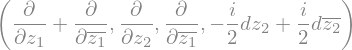

In [9]:
D_x1,D_z2,D_BARz1,d_y2 # displaying some objects to illustrate the formatting behavior

Ex.6. Initialize a system that defaults to display in real coordinates instead:

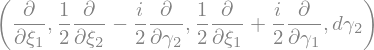

In [10]:
createVariables('zeta', 'xi', 'gamma', 2, default_var_format='real')  # This initializes a complex variable system similar to 
                                                                    # the last one, except elements in this system default to
                                                                    # display in real variable formats.
D_xi1,D_zeta2,D_BARzeta1,d_gamma2 # displaying some objects to illustrate the formatting behavior when 'real' is default

When working with complex variable systems it can be useful to switch between real and holomorphic coordinates. Apply `realToHol` and `holToReal` to objects to convert between formats. 

Note, these functions also update the *format preference* marker that `dgcv` objects internally cary. In the next cell, we will display some computed objects using the `show` command, which prints strings (and other objects) with $\LaTeX$ rendering.

In [11]:
hol_format_VF = D_x2+I*z1*D_y2
real_format_VF = D_xi2+I*zeta1*D_gamma2
show(f'The vector field ${LaTeX(hol_format_VF)}$ displays in holomorphic coordinates because it is built from objects that where set with this as the preference.')
show(f'Applying `allToReal()` returns an equivalent object, but everything (including its format preference) is converted to real coordinates. The result displays as ${LaTeX(simplify(allToReal(hol_format_VF)))}$.')
show(f'Contrastingly, the vector field ${LaTeX(real_format_VF)}$ displays in real coordinates by default because it is built from objects that where set with real formatting as the preference.')
show(f'Applying `allToHol()` returns an equivalent object, but everything (including its format preference) is converted now to holomorphic coordinates. The result displays as ${LaTeX(simplify(allToHol(real_format_VF)))}$.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

A third variable format for complex variables systems is used ubiquitously throughout `dgcv`. It is *holomorphic coordinates with symbolic conjugate*. `dgcv` uses seperate variables to represent the complex conjugates of holomorphic coordinates and anti-holomorphic coordinates. The anti-holomorphic coordinates are labeled with the same label as their dual holomorphic coordinates but pre-pended with "BAR". The third format is essential for `dgcv` functionality as it sidesteps the perinial simplify issues typical complex conjuagate handling typical in symbolic computation, so expect to encounter all three formats regularly when using `dgcv`. The three formats are typically refered to as "real", "hol", and "sym" in `dgcv` function names.

Commands, `holToReal`, `realToSym`, `symToHol`, `holToSym`, `symToReal`, `realToHol`, `allToSym`, `allToHol`, and `allToReal` provide comprehensive options for seamlessly switching between coordinate types.

The above `createVariables` commands initialized many objects and automatically generated labels for them. A technical note, `dgcv`'s object creation functions that create labels filter them through a label validation routine that prevents overwriting important existing labels.

These objects were registered in the VMF, enabeling important interaction with `dgcv`'s general functions.

To get a helpful summary table of initialized objects within the scope of `dgcv`'s VMF, use `vmf_summary()`

In [12]:
vmf_summary()

Coordinate System,# of Variables,Real Part,Imaginary Part,Vector Fields,Differential Forms
"z = (z1, ..., z2)",2,"x = (x1, ..., x2)","y = (y1, ..., y2)","D_z1,...,D_z2, D_BARz1,...,D_BARz2, D_x1,...,D_x2, D_y1,...,D_y2","d_z1,...,d_z2, d_BARz1,...,d_BARz2, d_x1,...,d_x2, d_y1,...,d_y2"
"zeta = (zeta1, ..., zeta2)",2,"xi = (xi1, ..., xi2)","gamma = (gamma1, ..., gamma2)","D_zeta1,...,D_zeta2, D_BARzeta1,...,D_BARzeta2, D_xi1,...,D_xi2, D_gamma1,...,D_gamma2","d_zeta1,...,d_zeta2, d_BARzeta1,...,d_BARzeta2, d_xi1,...,d_xi2, d_gamma1,...,d_gamma2"
a,1,----,----,D_a,d_a
alpha,1,----,----,D_alpha,d_alpha
b,1,----,----,D_b,d_b
c,1,----,----,D_c,d_c
"r = (r1, ..., r3)",3,----,----,"D_r1,...,D_r3","d_r1,...,d_r3"
"s = (s7, ..., s10)",4,----,----,"D_s7,...,D_s10","d_s7,...,d_s10"


Optional keywords `use_latex=True` and `style= ----` allow for some adjustment to the table formatting:

In [13]:
vmf_summary(use_latex=True,style='graph_paper') # Latex formatting may or may not compile, depending on the environment in which you are running the Jupyter notebook.

Coordinate System,# of Variables,Real Part,Imaginary Part,Vector Fields,Differential Forms
"$z = \left( z_{1}, \ldots, z_{2} \right)$",2,"$x = \left( x_{1}, \ldots, x_{2} \right)$","$y = \left( y_{1}, \ldots, y_{2} \right)$","$\frac{\partial}{\partial z_{1}}, \ldots, \frac{\partial}{\partial z_{2}}$, $\frac{\partial}{\partial \overline{z_{1}}}, \ldots, \frac{\partial}{\partial \overline{z_{2}}}$, $\frac{\partial}{\partial x_{1}}, \ldots, \frac{\partial}{\partial x_{2}}$, $\frac{\partial}{\partial y_{1}}, \ldots, \frac{\partial}{\partial y_{2}}$","$\operatorname{d} z_{1}, \ldots, \operatorname{d} z_{2}$, $\operatorname{d} \overline{z_{1}}, \ldots, \operatorname{d} \overline{z_{2}}$, $\operatorname{d} x_{1}, \ldots, \operatorname{d} x_{2}$, $\operatorname{d} y_{1}, \ldots, \operatorname{d} y_{2}$"
"$\zeta = \left( \zeta_{1}, \ldots, \zeta_{2} \right)$",2,"$\xi = \left( \xi_{1}, \ldots, \xi_{2} \right)$","$\gamma = \left( \gamma_{1}, \ldots, \gamma_{2} \right)$","$\frac{\partial}{\partial \zeta_{1}}, \ldots, \frac{\partial}{\partial \zeta_{2}}$, $\frac{\partial}{\partial \overline{\zeta_{1}}}, \ldots, \frac{\partial}{\partial \overline{\zeta_{2}}}$, $\frac{\partial}{\partial \xi_{1}}, \ldots, \frac{\partial}{\partial \xi_{2}}$, $\frac{\partial}{\partial \gamma_{1}}, \ldots, \frac{\partial}{\partial \gamma_{2}}$","$\operatorname{d} \zeta_{1}, \ldots, \operatorname{d} \zeta_{2}$, $\operatorname{d} \overline{\zeta_{1}}, \ldots, \operatorname{d} \overline{\zeta_{2}}$, $\operatorname{d} \xi_{1}, \ldots, \operatorname{d} \xi_{2}$, $\operatorname{d} \gamma_{1}, \ldots, \operatorname{d} \gamma_{2}$"
$a$,1,----,----,$\frac{\partial}{\partial a}$,$\operatorname{d} a$
$\alpha$,1,----,----,$\frac{\partial}{\partial \alpha}$,$\operatorname{d} \alpha$
$b$,1,----,----,$\frac{\partial}{\partial b}$,$\operatorname{d} b$
$c$,1,----,----,$\frac{\partial}{\partial c}$,$\operatorname{d} c$
"$r = \left( r_{1}, \ldots, r_{3} \right)$",3,----,----,"$\frac{\partial}{\partial r_{1}}, \ldots, \frac{\partial}{\partial r_{3}}$","$\operatorname{d} r_{1}, \ldots, \operatorname{d} r_{3}$"
"$s = \left( s_{7}, \ldots, s_{10} \right)$",4,----,----,"$\frac{\partial}{\partial s_{7}}, \ldots, \frac{\partial}{\partial s_{10}}$","$\operatorname{d} s_{7}, \ldots, \operatorname{d} s_{10}$"


Call `get_dgcv_themes()` to retreive a list of available formatting themes for the `vmf_summary` tables

Use `listVar` and `clearVar` respectively get labels for variables (and other objects) and delete variables (and any other objects) that are registered in `dgcv`'s VMF. In more detail, listVar returns labels that the VMF internally assigns to objects/systems of objects in its scope, and putting any such label into clearVar will delete all objects that the VMF associates with it.

In [14]:
clearVar(*listVar())

Cleared standard variable systems from the dgcv variable management framework: alpha, a, b, r, c, s
Cleared complex variable systems from the dgcv variable management framework: z, zeta


The previous line deleted all of the objects we created so far.

# Vector fields and differential forms

Vector fields and differential forms in `dgcv` are represented by VFClass and DFClass objects (which are themselves subclasses of the `dgcv.tensorField` class). There are several ways to initialize them. The basic initialization is through `createVariables(-- , withVF=True)`, `createVariables('hol_str' , 'real_str', 'im_str', --)` or `createVariables(-- , complex=True)`. The latter two work because `dgcv` always initializes coordinate vector fields/coframes when creating complex variable systems.

Let's create some variable systems, standard and complex, with VF and DF to work with:

In [15]:
createVariables('x', 2, withVF=True)
createVariables('zeta','xi','gamma', 3)
vmf_summary(style='blueprint') # This line is only to display a summary of the objects we just created

Coordinate System,# of Variables,Real Part,Imaginary Part,Vector Fields,Differential Forms
"zeta = (zeta1, ..., zeta3)",3,"xi = (xi1, ..., xi3)","gamma = (gamma1, ..., gamma3)","D_zeta1,...,D_zeta3, D_BARzeta1,...,D_BARzeta3, D_xi1,...,D_xi3, D_gamma1,...,D_gamma3","d_zeta1,...,d_zeta3, d_BARzeta1,...,d_BARzeta3, d_xi1,...,d_xi3, d_gamma1,...,d_gamma3"
"x = (x1, ..., x2)",2,----,----,"D_x1,...,D_x2","d_x1,...,d_x2"


Apply vector fields to functions with syntax like `D_x1(function)`, add them together with + and -, scale them by a scalar using *, and take their Lie brackets with `VF_bracket`.

Let's experiment with some of these, and use the `show` and `LaTeX` functions for more control and flexibility in what output gets displayed. Tip: use Python's *f" ... "* syntax to create formatted latex strings with SymPy and `dgcv` math objects automatically inserted.

In [16]:
vf1 = D_x1+gamma2*D_xi3-x2*xi2*D_gamma1
vf2 = D_x2+gamma1*D_gamma3-x1*gamma2*D_xi1
bracket = VF_bracket(vf1,vf2)
show(f'The Lie bracket of the vector fields ${LaTeX(vf1)}$ and ${LaTeX(vf2)}$ is $$\\left[{LaTeX(vf1)},{LaTeX(vf2)}\\right]={LaTeX(bracket)}$$')

<IPython.core.display.Latex object>

Similar syntax works to add/subtract/scale differential forms, and to apply them to vector fields. Use `exteriorProduct` to form a wedge product, or simply use the `*` multiplication for wedge products instead:

In [17]:
df_first_summand = exteriorProduct(d_zeta1,BARzeta2*d_BARzeta2+BARzeta1*d_zeta2)
theta = d_zeta2*d_zeta1+df_first_summand
theta_eval = theta(D_zeta1,D_BARzeta2)
show(f'Applying the differential form ${LaTeX(theta)}$ to $\\left({LaTeX(D_zeta1)},{LaTeX(D_BARzeta2)}\\right)$ yields $$\\theta\\left({LaTeX(d_zeta1)},{LaTeX(d_BARzeta2)}\\right)={LaTeX(theta_eval)}$$')

<IPython.core.display.Latex object>

Functions `LieDerivative`, `exteriorDerivative`, and `interiorProduct` behave as their names suggest: 

In [18]:
show(f'A Lie derivative of a function: $${LaTeX(LieDerivative(D_x1,x1**2+x2))},$$ a Lie derivative of a 1-form $${LaTeX(LieDerivative(D_x1,x1**2*d_x1*d_x2))},$$ a Lie derivative of a vector field $${LaTeX(LieDerivative(D_x1,x1*D_x2))},$$ an exterior derivative of a function $${LaTeX(exteriorDerivative(x1+x2))},$$ an exterior derivative of a 1-form $${LaTeX(exteriorDerivative(x1*d_x2))}, $$ and an interior product $${LaTeX(interiorProduct(D_x1,d_x1*d_x2))}.$$')

<IPython.core.display.Latex object>

`exteriorProduct` accepts any number of arguments, and evaluates their product from left to right. To add/subtract an arbitrary number of VF or DF, use `addVF` and `addDF`, which similarly accept any number of arguments. This is especially useful for computing sums or products of everything from a list of unknown length. 

To demonstrate it, let's use exterior product to compute the determinant of a symbolic $n\times n$ matrix, by computing the $n$-fold wedge product of $n$ differential forms:

In [19]:
dimension = 3 # set this to any positive integer, but ***CAUTION*** note formulas explode fast due to the determinant's complexity
createVariables('s', dimension, withVF=True) # creates n-dimensional coordinate system with variables labeled s1,s2,...
df_basis = get_DF(*s) # retrieves a list of coordinate differential forms for the coordinate system s.
createVariables('c',multiindex_shape=(dimension,dimension)) # creates an nxn array of variables that will represent arbitrary coefficients. variables where labeled as c_1_1,...c_n_n.
df_list = [sum([c[j][k]*df_basis[k] for k in range(dimension)]) for j in range(dimension)] # A list of n differential forms. Notice we used addDF to make each of the n elements.
volume_form = exteriorProduct(*[df for df in df_list])

show(f'The wedge product of all forms in ${LaTeX(df_list)}$ is $$\\mathrm{{volume\\,form}}={LaTeX(volume_form)}$$')

<IPython.core.display.Latex object>

That last example featured a useful function `get_DF`. There is also `get_VF` and these commands retrieve VF and DF associated with coordinates registered in DGCV's VMF. They accept any number of arguments. When we wrote `get_DF(*s)`, the `*s` notation serves to unpack the tuple `s=(s1,s2,...,sn)` so the result is equivalent to if we ran `get_DF(s1,s2,...,sn)` directly. 

In [20]:
show(f'Here is a list of vector fields associated with some of the coordinates we currently have initialized: ${LaTeX(get_VF(x2,gamma3,xi1,zeta2))}$') # getting VF example

<IPython.core.display.Latex object>

use `decompose` to decompose a vector field or differential form into a sum of such objects from a provided list:

In [21]:
createVariables('s', 3, withVF=True) # creates a 3-d. standard coordinate system with variables s1,s2,s3
interesting_2_form = exteriorDerivative((s1**2+s2*s3**2)/(1+s2**2))*(d_s1+d_s2+d_s3)
coframe = get_DF(s1,s2,s3) # gets coordinate DF
list_of_2_forms = [coframe[j]*coframe[k] for j in range(3) for k in range(j+1,3)] # a list of 2-forms
decomp_coeffs, decomp_basis = decompose(interesting_2_form,list_of_2_forms) # compute the decomposition

show(f'The differential form $${LaTeX(interesting_2_form)}$$ decomposes as a linear combination of the 2-forms $${LaTeX(decomp_basis)}$$ with coefficients $${LaTeX(decomp_coeffs)}.$$')

<IPython.core.display.Latex object>

Use `annihilator` to find a spanning set of vector fields whose interior product annihilates a given set of differential form, or to find a spanning set of 1-forms that annihilates a set of vector fields:

In [22]:
createVariables('u', 6, withVF=True, initialIndex=0) # creates a 6-d. standard coordinate system with variables u0,..,u3
quadric = u0+sum([j**2 for j in u[1:]])
contact_form = exteriorDerivative(quadric)
contact_distribution = annihilator([contact_form],u) # annihilator needs a coordinate system specified in its second argument. Any list/tuple of variables will do (i.e., it doesn't have be what the VMF regards as a single variable system). In this case, we happen to be using u=(u0,u1,u2,u3,u4,u5)

show(f'The contact distribution of the contact form ${LaTeX(contact_form)}$ is spanned by the vector fields $${LaTeX(contact_distribution)}.$$')

<IPython.core.display.Latex object>

Use `get_coframe` to get a list of 1 forms dual to a list of vector fields:

In [23]:
createVariables('eta', 4, withVF=True)
vf_list = [D_eta1-eta1*D_eta2, D_eta2-eta1*D_eta1]
coframe = get_coframe(vf_list)

show(f'The differential forms ${LaTeX(coframe)}$ are dual to the vector fields ${LaTeX(vf_list)}$.')

<IPython.core.display.Latex object>

`dgcv`'s vector fields and differential forms (i.e., VFClass and DFClass objects) have several attributes determining how `dgcv` functions interact with them, such as `varSpace`, `holVarSpace`, `realVarSpace`, `compVarSpace`, `coeffs`, `coeffs_dicts`, and more.

Use `assembleFromHolVFC`, `assembleFromHolVFC`, and `assembleFromCompVFC` to initialize complex vector fields from functions for their cooredinate VF coefficients in a specified complex coordinate system:

In [24]:
createVariables('z','x','y',2)
hol_vf=assembleFromHolVFC([z1,z2],z)
antihol_vf=assembleFromAntiholVFC([BARz1,BARz2],z)
comp_vf=assembleFromCompVFC([z1,z2],[BARz1,BARz2],z)
show(f'We just initialized a holomorphic VF $${LaTeX(hol_vf)}={LaTeX(simplify(allToReal(hol_vf)))},$$ an antiholomorphic VF $${LaTeX(antihol_vf)}={LaTeX(simplify(allToReal(antihol_vf)))},$$ and a general complex VF $${LaTeX(comp_vf)}={LaTeX(simplify(allToReal(comp_vf)))}$$ by directly specifying their coefficient in a coordinate system.')

<IPython.core.display.Latex object>

Use `complex_struct_op` to tranform vector fields in a complex variable system under the standard complex structure operator.

In [25]:
show(f'Applying `complex_struct_op` to the three vector fields from the previous example yields $$J\\left({LaTeX(hol_vf)}\\right)={LaTeX(complex_struct_op(hol_vf))},$$ $$J\\left({LaTeX(antihol_vf)}\\right)={LaTeX(complex_struct_op(antihol_vf))},$$ and $$J\\left({LaTeX(comp_vf)}\\right)={LaTeX(complex_struct_op(comp_vf))}.$$')

<IPython.core.display.Latex object>

Use `conjugate_dgcv` to apply the standard fiber-wise complex conjuation to $\mathbb{C}TM$ and $\mathbb{C}T^*M$

In [26]:
show(f'Applying `conjugate_dgcv` to the three vector fields from the previous example yields $$\\overline{{\\left({LaTeX(hol_vf)}\\right)}}={LaTeX(conjugate_dgcv(hol_vf))},$$ $$\\overline{{\\left({LaTeX(antihol_vf)}\\right)}}={LaTeX(conjugate_dgcv(antihol_vf))},$$ and $$\\overline{{\\left({LaTeX(comp_vf)}\\right)}}={LaTeX(simplify(conjugate_dgcv(comp_vf)))}.$$')

<IPython.core.display.Latex object>

The functions `Del` and `DelBar` represent the Dolbeault operators. Apply them to plain functions or differential forms. Here's an example using `DelBar` with `sympy.Function` to derive the Cauchy–Riemann equations:

In [27]:
createVariables('z','x','y')
from sympy import Function, I  # we'll use sympy.Function to create symbolic functions

u = Function('u')
v = Function('v')
CR_equations_form=simplify(allToReal(DelBar((u(x,y)+I*v(x,y))))) # we wrap it in allToReal to convert everything to real coordinates
show(f'The Cauchy–Riemann equations for the function $f(x,y)={LaTeX(u(x,y)+I*v(x,y))}$ to be holomorphic are $$0=\\overline{{\\partial}}\\left({LaTeX(u(x,y)+I*v(x,y))}\\right)={LaTeX(CR_equations_form)}.$$')

<IPython.core.display.Latex object>

# Finite-dimensional algebras

The `algebra_class` objects are `dgcv`'s representation of finite dimensional algebras. They store a symbolic basis and structure data defining the algebra with respect to that basis. Basis elements belong to the `algebra_element_class` class, another `dgcv` class. Adding, scaling, and multiplying `algebra_element_class` objects (according to their algebra's multiplication rules) is implemented simply with `+`, `-`, and `*`.

There are several ways to initialize an `algebra_class` object. The basic creator function  `createAlgebra`, which can process many forms of defining data (e.g., structure equations, matrix representations, vector field representations, $d$-by-$d$-by-$d$ array-like objects encoding structure coefficients, etc.)

One way to make a d-dimensional algebra is to specify a 3-dimensional $d$-by-$d$-by-$d$ array-like object (list of lists of lists is fine) decribing the algebra's structure constants in some basis and a label for the algebra. There are further optional arguments, which we will explore as we go. And there are flexible algebra creator functions that handle different kinds of structure data.

Like all `dgcv` creator functions (such as `createVariables` above),`createAlgebra` dispatches simultaneous initialization of many objects with controllable and automatic label generation (operating within `dgcv`'s label generation safeguards filters).

---

Here are several examples of instantiating alebras from different data formats:

## Algebra Example 1: Defining an algebra from structure equations
It can be convenient to input the algebra structure in the form of structure equations, i.e., telling the program what $x_i\star x_j$ equals for each basis pai $(e_i,e_j)$. `createAlgebra` supports this in the form of a dictionary whose keys are length 2 tuples, like `(x1,x2)`, and whose values are expressions representing their product.

- To make such a dictionary, one must first instantiate "placeholder variable" (e.g., x1,x2,...) to be used in the expressions. Using `createVariables` is a convenient way to make these.
- Products omitted from the structure equations dict are assumed to be zero.
- If the product rule is skew-symmetric (like for a Lie algebra), one can set `assume_skew=True`, and then only enter structure equations for just one $x_i\star x_j$ product for each $x_i\star x_j$ and $x_j\star x_i$ pair. 

In [28]:
clearVar(*listVar())   # Remove everything from VMF from previous examples
createVariables('x',9)
structure_equations = {(x1,x3):x7,(x2,x4):x7,(x1,x5):x8,(x2,x6):x8,(x3,x5):x9,(x4,x6):x9}
grading_vector = [-1,-1,-1,-1,-1,-1,-2,-2,-2]
createAlgebra(structure_equations,
              label='A',
              basis_labels='e', # This will yield basis labels "e_1",...,"e_9"
              grading=grading_vector,   # This assigns grading
              assume_skew=True,     # Needed, since we didn't enter skew structure equations
              basis_order_for_supplied_str_eqns=x   # Needed when instantiating from structure equations
              )

Cleared standard variable systems from the dgcv variable management framework: s, c, u, eta
Cleared complex variable systems from the dgcv variable management framework: z, zeta


The above cell created an algebra labeled `A` from given structure equations. Let's use the `summary` method to inspect its properties

In [29]:
A.summary(generate_full_report=True)

Progress updates log while introspecting properties (honoring `generate_full_report=True`):
A is skew-symmetric.
A satisfies the Jacobi identity.
A is a Lie algebra.
Deriving (or retrieving) maximal solvable ideal...
Finding a semisimple complement to the max. solvable ideal...
Decomposing semisimple subalgebra into simple subalgebras...
Cached result: Previously verified A is not a semisimple Lie algebra..
Computing ranks of simple subalgebras (with non-deterministic algorithm that works almost always)...
Computing derived series of the maximal solvable ideal...
Computing the lower central series of the maximal solvable ideal...


<dgcv.algebras.algebras_core.algebra_class.summary.<locals>._HTMLWrapper at 0x10ce6d6a0>

## Algebra Example 1: initializing from structure coefficient array

The product rule $\star$ on an algebra with basis $(e_1,\ldots,e_d)$ is determined by the coefficients $c_{i,j}^k$ in the structure equations $e_i\star e_j=\sum_k c_{i,j}^ke_k$. `createAlgebra` can process a list of lists of lists `L` for which `L[i][j][k]` equals $c_{i,j}^k$.

Here is an example building $\mathfrak{sl}_2$ from an array of its structure coefficients. Notice the other arguments provided assign a **label** to the created algebra, **labels** `X`, `Y`, and `H` for its created basis elements, and a **grading** for the algebra.

In [30]:
structureConstants=[[[0,0,0],[0,0,-1],[2,0,0]],[[0,0,1],[0,0,0],[0,-2,0]],[[-2,0,0],[0,2,0],[0,0,0]]] # structure constants for sl2

createAlgebra(structureConstants,'sl2',basis_labels=['X','Y','H'],grading=[2,-2,0])

The newly created algebra labeled `sl2` has many methods that allow one to check its various properties. Two high-level overview methods are `multiplication_table` and `summary`. Here is what they return for our new algebra:

In [31]:
sl2.multiplication_table()

,X,Y,H
X,0,-H,2 * X
Y,H,0,-2 * Y
H,-2 * X,2 * Y,0


In [32]:
sl2.summary()

Basis,X,Y,H
Grading 1,2,-2,0


Creating new algebra elements from the basis elements with `+`, `-`, and `*` is intuitive:

In [33]:
X*H+Y*X-2*X

H

The `basis_labels` and `grading` keywords above were optional. They allow us to specify labels for the algebra's basis (whereas default labels would have been created otherwise), and to specify $\mathbb{Z}$-grading weights for the algebra's basis elements. The algebra's product need not be compatible with the weights in *grading*, but the algebra_class does have a method for checking if it is.

Use attributes like `dimension`, `basis_labels`, `structureData`, and `grading` to access an algebra's properties

In [34]:
show(sl2.dimension,sl2.basis_labels,sl2.structureData,sl2.grading)

['X', 'Y', 'H']

Many of the `algebra_class` properties and methods are calculated only when requested, rather than when the object is created. After being calculated the first time, however, the object caches the property value so that it can be immediately recalled as needed. Calling up the method `is_semisimple` for example will initialize several calculations, checking if the algebra is skew-symmetric, satisfies Jacobi identities, finding the killing form etc., and each property once calculated is stored for fast recall later. 

The class's methods that report properties accept a `verbose=True` keyword, which if entered will prompt a longer report on the accessed property. For example, `.satisfies_jacobi_identity()` returns just True or False, whereas `.satisfies_jacobi_identity(verbose=True)` will return a list of algebra element combinations that fail the Jacobi identity if any are found.

In [35]:
sl2.is_semisimple(verbose=True)

sl2 is skew-symmetric.
sl2 satisfies the Jacobi identity.
sl2 is a Lie algebra.
Progress update: computing determinant of the Killing form...
sl2 is semisimple.


True

In [36]:
sl2.check_grading_compatibility(verbose=True)

The algebra structure of sl2 is compatible with all of its assigned Z-gradings.


True

Use `adjointRepresentation` to get a Lie algebra's adjoint representation

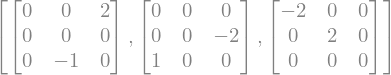

In [37]:
adjointRepresentation(sl2)

Use `killingForm` to get a matrix reprentation of its Killing form

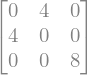

In [38]:
killingForm(sl2)

By default the `summary` method (used above) only presents previously computed properties of the algebra, but the optional keyword `generate_full_report=True` will compute a more extensive survey:

In [39]:
sl2.summary(generate_full_report=True)

Progress updates log while introspecting properties (honoring `generate_full_report=True`):
Cached result: Previously verified sl2 is a Lie algebra.
Decomposing semisimple subalgebra into simple subalgebras...
Cached result: Previously verified sl2 is a semisimple Lie algebra.
Computing ranks of simple subalgebras (with non-deterministic algorithm that works almost always)...
Computing derived series of the maximal solvable ideal...
Computing the lower central series of the maximal solvable ideal...


<dgcv.algebras.algebras_core.algebra_class.summary.<locals>._HTMLWrapper at 0x10ce6d550>

## Algebra Example 3: creating algebra from vector fields

`createAlgebra` can also assemble an `algebra_class` instance from vector fields spanning a Lie algebra. Here's an example with a typical vector field representation of $\mathfrak{so}(3)$:

In [40]:
clearVar(*listVar())
createVariables('x',3,withVF=True)
X1=x2*D_x3-x3*D_x2
X2=x3*D_x1-x1*D_x3
X3=x2*D_x1-x1*D_x2
vf_set=[X1,X2,X3]
createAlgebra(vf_set,'so3',basis_labels=['e1','e2','e3'])

Cleared standard variable systems from the dgcv variable management framework: x
Cleared finite algebra systems from the dgcv variable management framework: sl2, A


As with the previous example, we assigned lables to the algebra elements, so we can do basic arithemtic with them (where e1*e2 denotes algebra product etc.):

In [41]:
display(3*e1,e1+(1-I)*e2,e2*e3)

3 * e1

e1 + (1 - I) * e2

e1

We can use the `multiplication_table` method to view the structure extracted from the vector field basis:

In [42]:
so3.multiplication_table()

,e1,e2,e3
e1,0,e3,-e2
e2,-e3,0,e1
e3,e2,-e1,0


## Algebra Example 4: Creating an simple Lie algebras

The function `createSimpleLieAlgebra` can instantiate instances of the various simple Lie algebras. The basic syntax is `createSimpleLieAlgebra('A4')`, where the given parameter is a string like `A8`, `D5`, or `C4` etc. refering to the standard classification labeling of simple Lie algebras.

Here is an example with `D4`, and some subsequent `algebra_class` methods that are useful for analyzing it.

In [43]:
createSimpleLieAlgebra('D4')

We didn't specify any `label` parameter above (although, we could have with something like `createSimpleLieAlgebra('D4',label='alg')`), so the created algebra was assigned a default label of `so8`, since D_4 is $\mathfrak{so(8)}$. Remember, if you are ever unsure of what labels were assigned from creator functions, we can always use `vmf_summary()` to list created objects.

`createSimpleLieAlgebra` actual creates a special subclass of the general `algebra_class` called `simple_Lie_algebra`. For example `isinstance(so8,algebra_class)` still returns true, but `type(so8)` returns `dgcv.algebras.algebras_secondary.simple_Lie_algebra`.


`simple_Lie_algebra` instances are instantiated with a lot of additional precomputed structure coming from classical theory of simple Lie algebras, like gradings and root spaces. Let's use the methods `root_space_summary()` and `summary()` to preview some of these properties:

In [44]:
so8.root_space_summary()

This simple algebra D4 has 4 roots (r_1, ..., r_4), which are dual to the Cartan subalgebra basis (so8_1, so8_2, so8_3, so8_4). These roots correspond to vertices in the Dynkin diagram as follows:

┌───────────────┐
│      D4       │
╞═══════════════╡
│   r_1 r_2 r_3 │
│   ◯───◯───◯   │
│       │       │
│       ◯ r_4   │
└───────────────┘


In [45]:
so8.summary(generate_full_report=True)

Progress updates log while introspecting properties (honoring `generate_full_report=True`):
Cached result: Previously verified so8 is a Lie algebra.
Decomposing semisimple subalgebra into simple subalgebras...
Cached result: Previously verified so8 is a semisimple Lie algebra.
Computing ranks of simple subalgebras (with non-deterministic algorithm that works almost always)...
Computing derived series of the maximal solvable ideal...
Computing the lower central series of the maximal solvable ideal...


<dgcv.algebras.algebras_core.algebra_class.summary.<locals>._HTMLWrapper at 0x10ce6de80>

`simple_Lie_algebra` instances are assigned a default standard matrix representations accessible through the `preferred_representation` attribute:

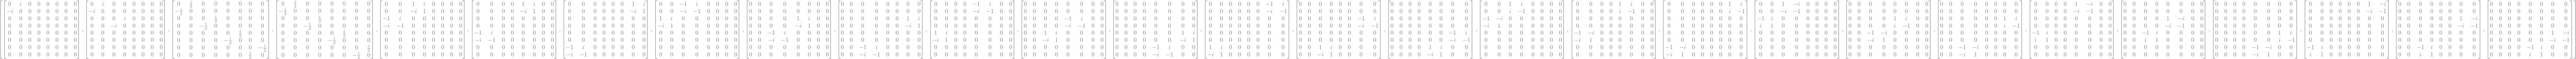

In [46]:
so8.preferred_representation

Parabolic subalgebras corresponding to marking various roots in the Dynkin diagram can be computed with the `parabolic_subalgebra` method, which instantiates or returns a `dgcv` `subalgebra_class` instance or independent `algebra_class` instance depending on optional keywords.

Refer to the `root_space_summary()` method output (example above) to see how `dgcv` enumerates the roots.

In [47]:
so8.parabolic_subalgebra(roots=[1,2],label='parabolic_12',basis_labels='eta')

By passing an optional `label` keyword in `parabolic_subalgebra(roots=[1,2],label='parabolic_12',basis_labels='eta')`, the method automatically instantiated the algebra with the given label saved in `dgcv`'s VMF, so we can refer to the algebra as `parabolic_12` going forward. For example, here is its `summary()` output:

In [48]:
parabolic_12.summary(generate_full_report=True)

Progress updates log while introspecting properties (honoring `generate_full_report=True`):
parabolic_12 is skew-symmetric.
parabolic_12 satisfies the Jacobi identity.
parabolic_12 is a Lie algebra.
Deriving (or retrieving) maximal solvable ideal...
Finding a semisimple complement to the max. solvable ideal...
Decomposing semisimple subalgebra into simple subalgebras...
Cached result: Previously verified parabolic_12 is not a semisimple Lie algebra..
Computing ranks of simple subalgebras (with non-deterministic algorithm that works almost always)...
Computing derived series of the maximal solvable ideal...
Computing the lower central series of the maximal solvable ideal...


<dgcv.algebras.algebras_core.algebra_class.summary.<locals>._HTMLWrapper at 0x10ce6e660>

Instead of creating a new `algebra_class` instance, `parabolic_subalgebra` can instead return a `subalgebra_class` instance by setting optional keywords differently:

In [49]:
new_subalgebra=so8.parabolic_subalgebra(roots=[1,2],format_as_subalgebra_class=True,return_created_obj=True)

`subalgebra_class` instances have many of the same methods as `algebra_class`, while they have additional methods concerning their relationship to their parent algebras. Here is the `summary()` output from the subalgebra that we just created:

In [50]:
new_subalgebra.summary(generate_full_report=True)

Progress updates log while introspecting properties (honoring `generate_full_report=True`):
Cached result: Previously verified the subalgebra is a Lie algebra.
The Levi decomposition algorithm is not fully supported for subalgebras yet and is being omitted from the current report. Suggestion: convert the subalgebra to an algebra_class with its `copy` method.
Cached result: Previously verified the subalgebra is a Lie algebra.
Progress update: computing determinant of the Killing form...
The subalgebra is not semisimple.
Computing ranks of simple subalgebras (with non-deterministic algorithm that works almost always)...


Basis,so8_1,so8_2,so8_3,so8_4,so8_5,so8_6,so8_7,so8_9,so8_10,so8_13,so8_16,so8_20,so8_23,so8_24,so8_25,so8_26,so8_27,so8_28
Grading 1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
Grading 2,0,0,0,0,0,1,1,1,1,0,0,2,1,1,0,1,1,0
Grading 3,0,0,0,0,0,0,1,0,1,1,-1,1,1,1,0,0,0,0
Grading 4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,-1,1,1,1


# Tensor fields

The general class for tensor fields in `dgcv` is `tensorField`. The library includes several subclasses of this general one, such as the `DFClass` and `VFClass` that we have already encountered. There is also an `STFClass` for symmetric tensor fields.

While there are several ways to initialize tensor fields, we will just look at using the stand class initializer for now. Creating a general tensor field requires at least 2 ingrediants, a coordinate system and a Python dictionary mapping index tuples to the tensor field's corresponding scalar component w.r.t. the given coordinate system. The syntax for a Python dictionary is `{key1:value, key2:value2, ...}`

In [51]:
clearVar(*listVar()) # refreshing the VMF
createVariables('r s t', withVF=True) # creating coordinate systems
coordinates1 = (r,s)
coordinates2 = (s,t)
structureData1 = {(0,0):2*r, (1,1):1}
structureData2 = {(0,0):1, (1,1):2*t}
tf1 = tensorField(coordinates1,structureData1)
tf2 = tensorField(coordinates2,structureData2)
tensor_dif = tf1 - tf2 # interpretted by extending their respective coordinate systems to a common one
tensor_product = tf1*tf2
show(f"We just created two tensor fields ${LaTeX(tf1)}$ and ${LaTeX(tf2)}$ in the respective coordinate systems ${LaTeX(tf1.varSpace)}$ and ${LaTeX(tf2.varSpace)}$. Their difference is $$\\big({LaTeX(tf1)}\\big)+\\big({LaTeX(tf2)}\\big)={LaTeX(tensor_dif)}$$ and their tensor product is $$\\big({LaTeX(tf1)}\\big)\\otimes\\big({LaTeX(tf2)}\\big)={LaTeX(tensor_product)}.$$ As TF with different coordinate spaces are combined dgcv computes a minimal common coordinate system for the new TF. For example, the coordinate space that was created for this tensor product is ${LaTeX(tensor_product.varSpace)}$.")

Cleared standard variable systems from the dgcv variable management framework: x
Cleared finite algebra systems from the dgcv variable management framework: so8, so3, parabolic_12


<IPython.core.display.Latex object>

Since some of this last example's tensor fields were symmetric, we can specify this data shape using the `data_shape` keyword. 

In [52]:
stf1 = tensorField(coordinates1, structureData1, data_shape='symmetric')
stf2 = tensorField(coordinates2, structureData2, data_shape='symmetric')
stf_sum = stf1 - stf2 # interpretted by extending their respective coordinate systems to a common one
stf_t_product = stf1*stf2
show(f"We just created two symmetric tensor fields ${LaTeX(stf1)}$ and ${LaTeX(stf2)}$ in the respective coordinate systems ${LaTeX(stf1.varSpace)}$ and ${LaTeX(stf2.varSpace)}$. Their difference is $$\\big({LaTeX(stf1)}\\big)-\\big({LaTeX(stf2)}\\big)={LaTeX(stf_sum)}$$ and their tensor product is $$\\big({LaTeX(stf1)}\\big)\\otimes\\big({LaTeX(stf2)}\\big)={LaTeX(stf_t_product)}$$")

<IPython.core.display.Latex object>

With `data_shape` settings like `data_shape='symmetric'` or `data_shape='skew'`, `dgcv` stores tensor data in a compressed format. As a result, computation times are roughly halved for tensor operations compared with default `data_shape`, so using `data_shape` refinements is recommended when applicable.

`dgcv` understands the natural relationship between its covariant tensor field objects and vector fields in the coordinates where they are defined. It supports natural syntax for evaluating the tensors, in the form `tensorField_instance(vf1,vf2,...)`. For example:

In [53]:
show(f'Evaluting ${LaTeX(stf_t_product)}$ on the vector field tuple ${LaTeX(get_VF(s,s,t,t))}$ yields ${LaTeX(stf_t_product(D_s,D_s,D_t,D_t))}$.')

<IPython.core.display.Latex object>

# Polynomials

#### `dgcvPolyClass` is a `dgcv` class that wraps Sympy `Poly` objects in a data structure that has additional attributes useful for interacting with DGCV's complex variables systems. If a polynomial's variables are from `dgcv`'s complex variables systems then building a `dgcvPolyClass` object from it provides easy access to tools for decomping the polymial in natural ways.

In [54]:
from sympy import I  # we'll use sympy's imaginary unit

clearVar(*listVar())
createVariables('z','x','y',4)
plain_poly = x1**4+I*x2**3*y2-x3**2*y3**2-I*x4*y4**3+y4**4+1
promoted_poly = dgcvPolyClass(plain_poly)
show(f'Taking a plain polynomial expression $${LaTeX(plain_poly)}$$ in variables from a `dgcv` complex variable system, we promoted it to a `dgcvPolyClass` object *promoted_poly*. The class has attributes that let us now immediately compute some of its complex structure-related properties. Finding it\'s decomposition into holom., antiholom. parts, and mixed parts, `promoted_poly.holomorphic_part` retrieves $${LaTeX(promoted_poly.holomorphic_part)},$$ while `promoted_poly.antiholomorphic_part` retrieves $${LaTeX(promoted_poly.antiholomorphic_part)}$$ and `promoted_poly.mixed_terms` retrieves $${LaTeX(promoted_poly.mixed_terms)}.$$ Notice that the constant term appears in both the holomorphic and antiholomorphic parts, but these three parts are otherwise complementary. To get an exact compliment to the mixed terms part, `promoted_poly.pluriharmonic_part` retrieves $${LaTeX(promoted_poly.pluriharmonic_part)}.$$')

Cleared standard variable systems from the dgcv variable management framework: t, r, s


<IPython.core.display.Latex object>

Use `createPolynomial` and `createBigradPolynomial` to easily initialize general polynomials in an assigned variable space with new labeled variables as cooefficients. The new labeled variables are registered in the VMF automatically, so tasks like counting the number of cooefficients created are simplified with `dgcv`'s various VMF features, principally `vmf_summary`.

These object creation functions have lots of optional keyword arguments for finer controls. Check their docstrings for more details. Here is an example of a typical application using the $z$ variables from the previous example:

In [55]:
new_polynomial = createPolynomial('alpha', 4, z, homogeneous=True) 
show(f'We just created a degree 4 homogeneous polynomial in the variables ${LaTeX(z)}$ with coefficients ${LaTeX(alpha)}$: $${LaTeX(new_polynomial)}$$')

<IPython.core.display.Latex object>

Having created so many variables, it can be helpful to reference the `vmf_summary` table summarizing what was created:

In [56]:
vmf_summary(style = 'Monet')

Coordinate System,# of Variables,Real Part,Imaginary Part,Vector Fields,Differential Forms
"z = (z1, ..., z4)",4,"x = (x1, ..., x4)","y = (y1, ..., y4)","D_z1,...,D_z4, D_BARz1,...,D_BARz4, D_x1,...,D_x4, D_y1,...,D_y4","d_z1,...,d_z4, d_BARz1,...,d_BARz4, d_x1,...,d_x4, d_y1,...,d_y4"
"alpha = (alpha1, ..., alpha35)",35,----,----,"D_alpha1,...,D_alpha35","d_alpha1,...,d_alpha35"


# Coordinate transformations

Coordinate transformations are organized within `dgcv`'s `coordinate_map` class. It organizes formulas for transforming differential geometric objects objects under transformations like coordinate changes and more general smooth mappings with convenient class methods like `pull_back` and `differential`. As one may expect, `pull_back` operates on differential forms and general covariant tensor fields (specifically `DFClass`, `TFClass`, and `STFClass`) while `differential` operatates on vector fields (`VFClass`).

> Note: currently `differential` and `pull_back` are only partially integrated with the full `dgcv` library, as it only acts on special tensor field class (`VFClass`, `DFClass`, and `STFClass`). Coordinate transformations on the general tensor field class `tensorField` will be added in a future release.

Let's see how it works with a typical *cartesion to polar* coordinate change.

In [57]:
from dgcv import *

In [58]:
from sympy import cos, sin  # We'll use sympy's trig functions

clearVar(*listVar())
createVariables('x, y', withVF=True, assumeReal=True)
createVariables('r theta', withVF=True, assumeReal=True)

polar_to_cart_map = coordinate_map((r,theta),(x,y),(r*cos(theta),r*sin(theta))) # Here we defined the coordinate map

polar_frame = get_VF(r,theta)
polar_frame_to_cart = [polar_to_cart_map.differential(j) for j in polar_frame]

sym_tensor_repres_metric_in_cart = STFClass((x,y),{(0,0):1,(1,1):1},2)
cart_metric_to_polar = polar_to_cart_map.pull_back(sym_tensor_repres_metric_in_cart)

show(f'Applying `polar_to_cart.differential` to the frame ${LaTeX(polar_frame)}$ gives $${LaTeX(polar_frame)}_{{(r,\\theta)}} \\mapsto {LaTeX(polar_frame_to_cart)}_{{(x,y)={LaTeX(tuple(polar_to_cart_map.coordinate_formulas))}}}.$$ Applying `polar_to_cart.pull_back` to the symmetric tensor ${LaTeX(sym_tensor_repres_metric_in_cart)}$ expressed in cartesian coordinates gives its expression $${LaTeX(cart_metric_to_polar)}$$ in polar coordinates.')


Cleared standard variable systems from the dgcv variable management framework: alpha
Cleared complex variable systems from the dgcv variable management framework: z


<IPython.core.display.Latex object>

The coordinate maps class is not fully developed yet, as it has less flexibility for variable types between objects it interacts with. Removing the hastle of managing variable types (real vs. complex) while computing with complex variables is a central goal throughout `dgcv`, so such features for `coordinate_map` will be built out in future releases.

# Structure specific tools

`dgcv` has a modest and growing library of tools with relavence specialized to specific geometric structures, like Riemmanian, Kähler, Poisson, and CR geometry.

As the package's first purpose is providing foundational DG tools, this part of the library is rather ancillary. It demonstrates, however, the kinds of applications that are tractible using just `dgcv`'s core library as these more specialized functions are essentially built from the basic `dgcv` functions (mostly) previewed above. 

We'll conclude this notebook with a few example.

## Example 1: Finding symmetries of a CR hypersurface:

In [59]:
from dgcv import *

In [60]:
from sympy import conjugate, re  # sympy's conjugation and real part commands

clearVar(*listVar())
createVariables('z','x','y',3,initialIndex=0)
definingFunction=(z1*conjugate(z1))*re(z2+z1**2)**2
graphVar=im(z0)
definingEqn=graphVar-definingFunction

Euler = 6*z0*D_z0+z1*D_z1+2*z2*D_z2

show(f'Let\'s consider the hypersurface $$M=\\left\\{{{LaTeX(definingEqn)}=0\\right\\}}\\subset\\mathbb{{C}}^3.$$ Observe that the vector field $$X={LaTeX(Euler)}$$ is a holomorphic infinitesimal symmetry of $M$. Indeed, we can use `realPartOfVF` and `LieDerivative` to compute $$\\mathcal{{L}}_{{\\Re(X)}}\\left({LaTeX(definingEqn)}\\right)={LaTeX(simplify(LieDerivative(realPartOfVF(Euler), definingEqn)))}$$, and apply `.subs({{y0:definingFunction}})` to get $$\\left.\\mathcal{{L}}_{{\\Re(X)}}\\left({LaTeX(definingEqn)}\\right)\\right|_{{z\\in M}}={LaTeX(simplify(allToReal((LieDerivative(realPartOfVF(Euler), definingEqn))).subs({y0:allToReal(definingFunction)})))}.$$')

Cleared standard variable systems from the dgcv variable management framework: r, theta, x, y


<IPython.core.display.Latex object>

Possesing such a symmetry equips the hypersurface with lots of nice structure. To begin with it's algebra of infinitesimal symmetries will be $\mathbb{Z}$-graded. Deep results from 
>     Martin Kolar, Francine Meylan, and Dmitri Zaitsev.  
>     "Chern–Moser operators and polynomial models in CR geometry."  
>     *Advances in Mathematics* 263 (2014): 321-356.
moreover comprehensively describe the hypersurface's symmetry algebra. For this example, they imply its infinitesimal symmetries will be weighted homogeneous in the $z$ coordinates w.r.t. weights [$z_0 \to 6$, $z_1 \to 1$, $z_2 \to 2$], and that their weights all fall within the band from -6 to 6. They are thus determined by a finite set of linear equations, a perfect task for the computer!

The function `findWeightedCRSymmetries` applies algorithms that search for weighted homogeneous CR symmetries with a given weight. Let's pass it over the present example looping accross weights between -6 and 6:

In [61]:
symmetryFieldList=[]
variableLabels=[j for j in list(map(chr, range(ord('A'), ord('Z')+1))) if j!='I'] #This just creates a list of labels to use for coefficients of the vector field symmetries to be found

# check for weighted homogeneous symmetries with weights in the range [-6,6] w.r.t. weights [6,1,2]
for j in range(-6,7):
    # Let's compute the symmetry vector fileds using the optional argument *returnVectorFieldBasis=True*, and put it into our running list. The VF is a holomorphic vector field whose real part is the actual symmetry:
    weighted_solutions = findWeightedCRSymmetries(definingFunction,z,[6,1,2],j,graphVar,variableLabels[j+6],returnAllformats=True, simplify=True)
    symmetryFieldList=symmetryFieldList + weighted_solutions[1]
    
    # `findWeightedCRSymmetries` also returns parameterized holomorphic coefficients in a addition to VF. Let's display everything nontrivial that it finds:
    if set(weighted_solutions[0]) != {0}:
        show(f"`findWeightedCRSymmetries` found the parameterized coefficients ${LaTeX(weighted_solutions[0])}$ describing the weight ${LaTeX(j)}$ symmetries (w.r.t. weight $z_0\\to 6, z_1\\to 1, z_2\\to 2$) spanned by: $${LaTeX(weighted_solutions[1])}$$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In the previous computation, we collected 7 holomorphic symmetries found from accross the loops into a list `symmetryFieldList`. The aforementioned result of Kolar–Meylan–Zaitsev implies that this list should span a Lie algebra. Let's toss `symmetryFieldList` into the `createAlgebra` function, which will automatically verify its closure under Lie brackets.

In [62]:
createAlgebra(symmetryFieldList,'aut',grading=[-6, 2, 0, 0, 0, 2, 6]) # This instructs it to label the algebra `aut` and its basis elements `aut1`, `aut2`, etc.

The circumstance that `createAlgebra` completed without raising warnings/errors implies that the vector fields indeed span a Lie algebra. And now that we have passed them into an algebra_class object `aut`, the abstract algebraic data defining the algebra is fully extracted from the vector fields. To analyze the algebra, working with `aut` directly rather than the VF list is usually preferable.

For example use `aut.is_semisimple()` to check for if it is semisimple, use `adjointRepresentation(aut)` to compute its adjoint representation, etc.

In [63]:
aut.is_semisimple(verbose=True)

Cached result: Previously verified aut is a Lie algebra.
Progress update: computing determinant of the Killing form...
aut is not semisimple.


False

In [64]:
long_list_of_matrices = adjointRepresentation(aut)
show(f'Here is the first in a long list of matrices `adjointRepresentation(aut)`: ${LaTeX(long_list_of_matrices[0])}$')

<IPython.core.display.Latex object>

Compared to working with the algebra's VF representation where computing Lie brackets and decomposing them into basis components has a lot of computational overhead, brackets in the abstract algebra `aut` are computed almost instantateously. Use `*` for the algebra product, which in this example represents the Lie bracket since we are working with a Lie algebra.

In [65]:
show(f'The Lie bracket $[aut_1,aut_7]$ is:')    # formatting algebra elements in `show` is undergoing a redesign. In the meantime, use `ipython.display` or `print` to output a readable description of such objects.
display(aut_1*aut_7)

<IPython.core.display.Latex object>

-1/2 * aut_4

## Example 2: One more CR Geometry example; computing a CR distribution.

Let's compute differential of the defining function of the hypersurface $M=\{x_1x_2+x_1^2x_3=x_0\}\subset\mathbb{C}^4$, where $z_j=x_j+iy_j$.

In [66]:
clearVar(*listVar()) # resets the VMF
createVariables('z', 'x', 'y', 4, initialIndex=0) # creates a coordinate system
rho = (x1*x2 + x1**2*x3 - x0)
d_rho = exteriorDerivative(rho)
show(f"$M=\\{{0={LaTeX(rho)}\\}}$ defines a CR hypersurface in $\\mathbb{{C}}^4$") 
show(f"$\\rho$ is: ${LaTeX(rho)}$")
show(f"$d \\rho$ is: ${LaTeX(d_rho)}$")

Cleared complex variable systems from the dgcv variable management framework: z
Cleared finite algebra systems from the dgcv variable management framework: aut


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Use `annihilator` to compute the tangent bundle TM

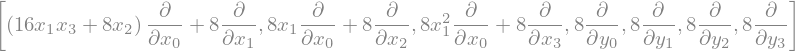

In [67]:
dfList = [d_rho]
TMbasis = annihilator(dfList, x + y)
TMbasis # displays a basis of the tangent bundle

To verify the computation worked, let's compute Lie derivative of $\rho$ along these vector fields (it should vanish along the hypersurface) using `LieDerivative`

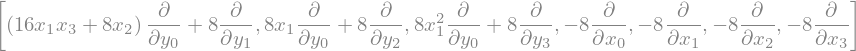

In [68]:
J_of_TMbasis = [complex_struct_op(vf) for vf in TMbasis]
J_of_TMbasis

Compute the CR distribution, which is the intersection of $TM$ with its image under the complex structure operator. We can use `annihilator` again to get the intersection of two distributions.

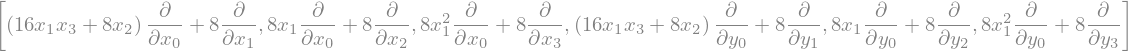

In [69]:
CR_distribution = annihilator(annihilator(J_of_TMbasis, x + y) + annihilator(TMbasis, x + y), x + y)
CR_distribution

Apply Dolbeault operators `Del` and `DelBar` to represent the Levi form

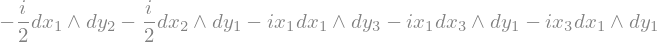

In [70]:
# "allToReal" is used here to switch everything to real coordinates. When applied to bare functions the Dolbeault op. default to holomorphic coordinates, whereas when applied to differential forms they dynamically adjust format based on the given k-form.
LeviForm = allToReal(Del(DelBar(rho))) 
LeviForm

Use `annihilator` to compute the Levi form's kernel within the CR distribution

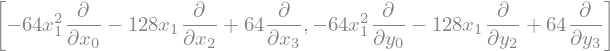

In [71]:
Levi_kernel = annihilator([LeviForm], x + y, control_distribution=CR_distribution)
Levi_kernel

To verify this computation from another viewpoint, let's check each Lie bracket between VF in Levi_kernel and in CR_distribution. We'll use `decompose`, which decomposes an object w.r.t. a given basis if possible, to directly check that the brackets indeed stay within the CR distribution.

In [72]:
for j in Levi_kernel:
    for k in CR_distribution:
        coeffsOfBracket = decompose(LieDerivative(j,k),CR_distribution)[0]
        if set(tuple(coeffsOfBracket)) != {0}: # disregard commuting brackets
            show(f"Bracket of ${LaTeX(j)}$ with ${LaTeX(k)}$ decomposed with coefficients: ${coeffsOfBracket}$")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We initialized several objects during this example. Let's delete them all using `clearVar` and `listVar` to clean this session's active namespace, getting ready for the next example.

In [73]:
clearVar(*listVar()) # This deletes all objects within the scope of dgcv's variable management framework. Refreshing vmf_summary() after running this line will correspondingly display an empty table.

Cleared complex variable systems from the dgcv variable management framework: z


## Example 3: Computing metric invariants from a Kähler potential


In this example we will see that `conjugate` and `I` (the symbolic imaginary unit) from SymPy seamlessly integrate with `dgcv`'s handling of complex variables, and that `sympy.simplify` can be applied to `dgcv` objects like differential forms and vector fields directly.

We'll set up a Kähler potential $\rho$ known to yeild a Fubini–Study metric. 

This example can be done in real or holomorphic coordinates. The relavent lines for each are denoted with comments in the code. Coordinate format affects complexity of the formulas, which in turn affects compute-time for the program. Let's go with holomorphic coordinates now, as they yeild clean formulas in this example, and, if interested, afterwards try the example again in real coordinates by commenting/uncommenting the relavent lines in the next code block here (and switch the "default_var_format" setting to 'real' in the first line):

In [74]:
from sympy import ln  # we'll use sympy's logarithm for this example

createVariables('z','x','y', 2, default_var_format='complex') # Change default to 'real' here for real coordinate formatting.
rho=ln(1+sum([j*conjugate(j) for j in z])) #Fubini–Study metric
# varSpace=x # if default var format is real
varSpace=z # if default var format is complex
# kahlerForm=simplify(allToReal((I/2)*Del(DelBar(rho)))) # if default var format is real
kahlerForm=simplify((I/2)*Del(DelBar(rho))) # if default var format is real, wrap this line in `allToReal` (after importing it from dgcv).

show(f'$\\rho$ is: ${LaTeX(rho)}$')
show(f'provided coordinates (it is enough to provide the \'real part\' or \'hol. part\' coordinates, as \'im. part\' and \'antihol. part\' will be inferred):${LaTeX(varSpace)}$')
show(f'The Kahler form is: $${LaTeX(kahlerForm)}$$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

`dgcv` has a class `KahlerStructure`. Creating a `KahlerStructure` object enables quick realizations of the structure's fundamental related objects like its metric, various invariant tensors, and sectional curvature by using the *class atributes* and *class methods*.

In [75]:
Fubini_Study_structure=KahlerStructure(varSpace,kahlerForm)
show(f'Using the Kahler form, we just created what `dgcv` regards as a Kahler structure on the coordinate patch ${LaTeX(Fubini_Study_structure.varSpace)}$')

<IPython.core.display.Latex object>

The `KahlerStructure` class has an attribute `metric`, which stores lots of useful properties of the Kähler structure's Riemannian metric. 

We just created a class object *Fubini_Study_structure*. Let's access its `metric` attribute and give it a name, *g*, for easy reference later.

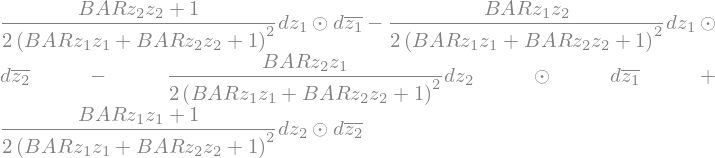

In [76]:
g=Fubini_Study_structure.metric
show(g)

The object we just labeled as *g* is type `MetricClass`, which is another specialized `dgcv` class. It too has many useful attributes. Here's one that retrieves the Christoffel symbols in the coordinate system we used to initialize *g*.

In [77]:
Gamma=g.Christoffel_symbols_of_the_second_kind

# Let's use a sympy.Matrix to arrange some of the Christoffel symbols in a nicely displayable format:
from sympy import Matrix

dimension=len(x+y)
christoffel_array = Matrix(dimension,dimension, lambda j,k : Gamma[j,k,0])

show(f'Some of the Christoffel symbols in the basis ${LaTeX(symToHol(Fubini_Study_structure.varSpace))}$, for example, are: $\\left(\\Gamma_{{j,k}}^1\\right)_{{1\\leq j,k\\leq {dimension}}}={LaTeX(christoffel_array)}$')

<IPython.core.display.Latex object>

We can get its (0,4)-type Riemann Curvature tensor with the `RiemannCurvature` attribute

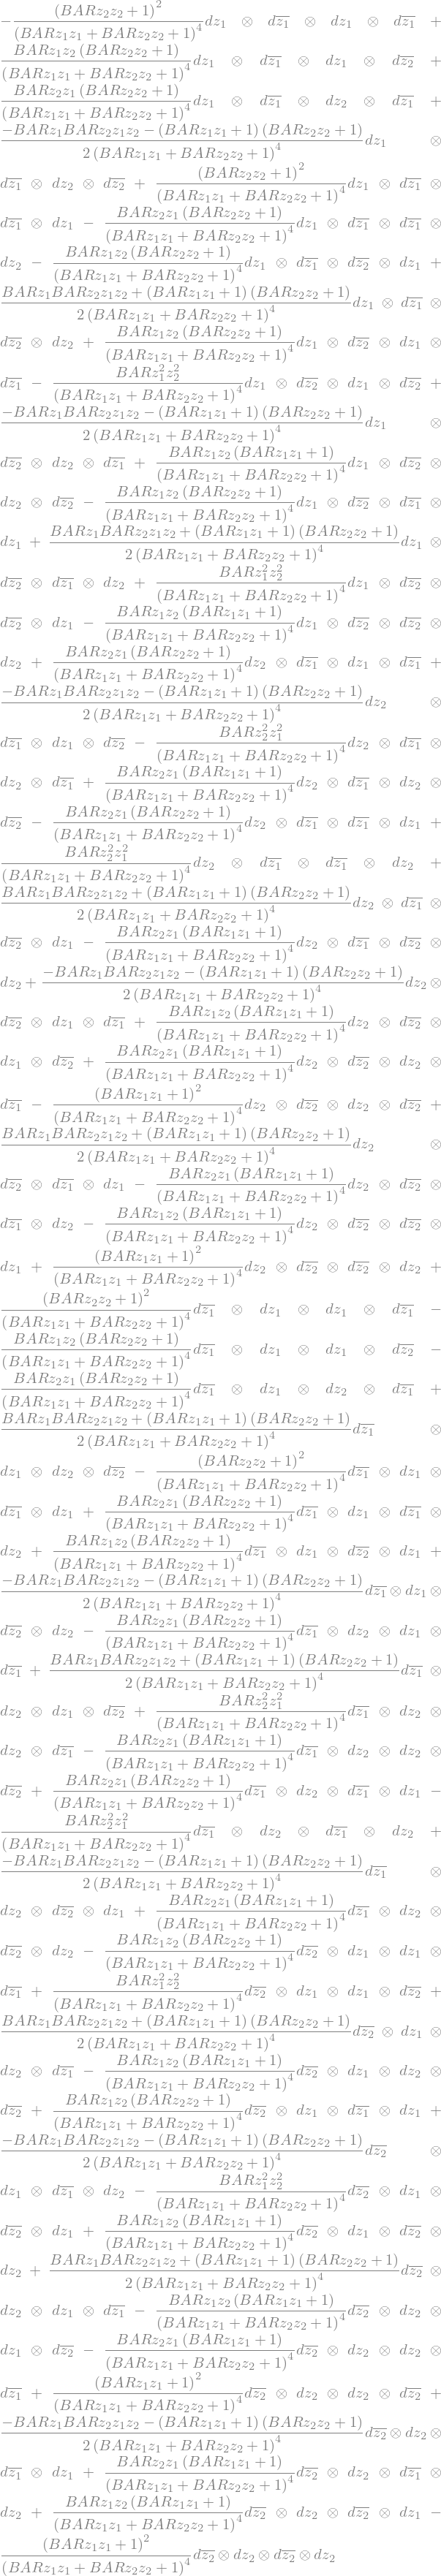

In [78]:
show(g.RiemannCurvature)

... and `scalarCurvature`...

In [79]:
show(g.scalarCurvature)

`dgcv` understands the natural relationship between its covariant tensor field objects and vector fields, and supports natural syntax for evaluating the tensors. For example, let's apply the some of the metric's invariant tensors to vector fields:

In [80]:
VF1= D_z1+D_z2
VF2=(z1**2-y2)*D_x2-(x1**2*BARz2)*D_y2 # We have written the vector field with disorganized real/holomorphic coordinate choices just to illustrate that DGCV can handle such formatting correctly
applying_g=g.SymTensorField(VF1,VF2)
applying_Ricci=g.RicciTensor(VF1,VF2)
show(f'Applying the Riemann metric and it\'s Ricci tensor to ${LaTeX(VF1)}$ and ${LaTeX((VF2))}$ yields $$g(VF_1,VF_2)={LaTeX((applying_g))}$$ and $$Ric(VF_1,VF_2)={LaTeX(applying_Ricci)}.$$') 

<IPython.core.display.Latex object>

Use the class method `sectionalCurvature()` to compute sectional curvature.

In [81]:
sCurvature = g.sectionalCurvature(VF1,VF2)
show(f'The sectional curvature evaluation: ${LaTeX(sCurvature)}$')

<IPython.core.display.Latex object>

If the Kahler structure were arbitrary this constant sectional curvature value would be quite surprising. In this cases it is rather related to the Fubini–Study metric's constant *holomorphic sectional curvature*, defined by hooking the complex structure operator into the Riemann curvature tensor, namely
$$
\mathrm{sec}_{hol}(\mathrm{span}_{\mathbb{R}}(V,JV))=R(V,JV,V,JV) \quad\quad\forall\, |V|=g(V,V)=1
$$
or, equivalently,
$$
\mathrm{sec}_{hol}(\mathrm{span}_{\mathbb{R}}(V,JV))=\frac{R(V,JV,V,JV)}{g(V,V)g(JV,JV)-(g(V,JV))^2}=\frac{R(V,JV,V,JV)}{(g(V,V))^2} \quad\quad\forall\, V \in\mathfrak{X}(\mathbb{C}TM).
$$
The latter identity is nicer for us because the former's norm constraint involves a square root, which introduces more computational over head, slowing down functions like sympy.simplify. Let's use `dgcv` to compute the metric's *holomorphic scalar curvature*, showing that it is constant.

To see it, we should apply the $\mathrm{sec}_{hol}$ to *arbitrary* vector fields.

To represent *arbitrary* vector fields, we'll use `get_VF` and `createVariables` to grab the coordinate vector field basis for our current coordinates and create some new variables $\alpha_{1},\ldots, \alpha_{4}$ to use as coefficients.

In [82]:
VF_basis=get_VF(*(x+y)) # This retrieves coordinate vector fields for the real coordinates in the tuple x+y=(x1,x2,y1,y2)
createVariables('alpha',len(VF_basis)) # Creates the number of variables alpha1, alpha2, ... matching the length of the vector field list VF_basis
arbitrary_VF = addVF(*[alpha[j]*VF_basis[j] for j in range(len(VF_basis))]) # addVF adds any number of vector fields together. We are giving it a list [vf1,vf2,...] and "opening the list" with *. 
J_of_VF = complex_struct_op(arbitrary_VF)
norm_squared = g.SymTensorField(arbitrary_VF,arbitrary_VF)
show(f'Using the vector fields ${LaTeX(VF_basis)}$ and coefficients ${LaTeX(alpha)}$, we created vector fields $$ V={LaTeX(arbitrary_VF)}$$ and $$ J(V)={LaTeX(J_of_VF)}$$')
show(f'The norm squared of $V$ is ${LaTeX(norm_squared)}$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [83]:
holSecCurvature =(1/(norm_squared)**2) * g.RiemannCurvature(arbitrary_VF,J_of_VF,arbitrary_VF,J_of_VF)
simplified_HSC = simplify(holSecCurvature)
show(f'The holomorphic sectional curvature evaluated on an arbitrary complex line bundle is $$\\mathrm{{sec}}_{{hol}}(\\mathrm{{span}}_{{\\mathbb{{R}}}}(V,JV))={LaTeX(simplified_HSC)}$$')

<IPython.core.display.Latex object>

To compute the Bochner tensor of a Kahler structure, call the `Bochner` attribute of a `KahlerStructure` class object. Computing the tensor directly in the present example, we find that it vanishes:

In [84]:
Bochner_tensor = Fubini_Study_structure.Bochner

show(f'The Bochner tensor $B\\in \\Gamma\\left(T^{{1,0}}M\\otimes T^{{0,1}}M\\otimes T^{{1,0}}M\\otimes T^{{0,1}}M\\right)$ of the Fubini--Study metric $$g={LaTeX(g)}$$ is $$B={LaTeX(Bochner_tensor)}.$$')

<IPython.core.display.Latex object>

## Example 4: Computing Gaussian curvature with tensor field pullbacks

In [85]:
from sympy import (ln,simplify,cos,sin,tan)     # We'll use trig and ln functions from the sympy library
clearVar(*listVar()) # This is here just in case variables where not cleared from previous examples
createVariables('theta phi x y z', withVF=True) # Initializes some 'standard' variables (i.e. without special complex var. handling) with vector fields.
createVariables('r', 2) #creates a pair of parameter variables r1, r2

Cleared standard variable systems from the dgcv variable management framework: alpha
Cleared complex variable systems from the dgcv variable management framework: z


For coordinate transformations and mappings between manifolds, we can use `dgcv`'s `coordinate_map` class. It organizes formulas for transforming DG objects, with convenient methods like `pull_back` and `differential`. 

To demonstrate it, let's consider parameterized surfaces in $\mathbb{R}^3$. We'll use `coordinate_map` to define the parameterization. Let's begin with a sphere of radius $r_1$:

In [86]:
coor1 = r1*cos(phi)*sin(theta) # coordinate components of our map
coor2 = r1*sin(phi)*sin(theta)
coor3 = r1*cos(theta)

sphere_embedding = coordinate_map((theta, phi),(x, y, z), (coor1,coor2,coor3)) # set's up a mapping between coordinate spaces (rho, theta) and (x, y, z).

`coordinate_map` has several useful attributes. `domain_frame`, `range_coframe` etc. return lists of coordinate vector fields/differential forms in whatever coordinates we specified when initializing *sphere_embedding*.

In [87]:
show(f'The domain of our sphere_embedding map has a coframe ${LaTeX(sphere_embedding.domain_coframe)}$.')
show(f'It\'s codomain has the frame ${LaTeX(sphere_embedding.range_frame)}$.')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Use the `JacobianMatrix` attribute to get a matrix representation of the differential. 

It is returned as a list of lists in a 2-d. array shape (which is choice made throughout `dgcv` to default to data storage structures with minimal computational overhead). Pass it to sympy.Matrix for convenient linear algebra tools.

In [88]:
jacobian = sphere_embedding.JacobianMatrix

from sympy import Matrix

jacobiMat=Matrix(jacobian)

show(f'Here is a matrix representation of our embedding\'s differential: $${LaTeX(jacobiMat)}:\\mathrm{{span}}{LaTeX(sphere_embedding.domain_frame)}\\to \\mathrm{{span}}{LaTeX(sphere_embedding.range_frame)}$$')


<IPython.core.display.Latex object>

Use `metric_from_matrix` to set up a Euclidean metric on the $(x,y,z)$ coordinate space.

In [89]:
EuclideanMetric = metric_from_matrix((x,y,z),[[1,0,0],[0,1,0],[0,0,1]])
show(EuclideanMetric)

Use `pullback` to pull back the Euclidean metric along our immersion $\mathrm{span}\{\theta,\phi\}\to \mathrm{span}\{x,y,z\}$ to the parameter space $\mathrm{span}\{\theta,\phi\}$. Let's label the obtained metric on $\mathrm{span}\{\theta,\phi\}$ as *g_sphere*.

In [90]:
g_sphere = simplify(sphere_embedding.pull_back(EuclideanMetric))
show(g_sphere)

The metric's `sectionalCurvature()` class method applied to a basis will give us the Gaussian curvature.

In [91]:
sec_curv_sphere = simplify(g_sphere.sectionalCurvature(D_theta,D_phi))
show(f'The Gaussian curvature at a point $(\\theta, \\phi)$ is $$\\mathrm{{Gauss}}_{{\\mathrm{{sphere}}}}=\\mathrm{{sec}}_{{g}}\\left({LaTeX(D_theta)},{LaTeX(D_phi)}\\right)={LaTeX(sec_curv_sphere)},$$ that is, the Gaussian curvature of spheres is constant and inversly proportional to the square of their radii.')

<IPython.core.display.Latex object>

Having examined the pieces of that computation, let's repeat it for Dini's surfaces, another classical example of constant curvature surfaces.

In [92]:
coor1 = r1*cos(theta)*sin(phi) # coordinate components of our map
coor2 = r1*sin(theta)*sin(phi)
coor3 = r1*(cos(phi)+ln(tan(phi/2)))+r2*theta
Dini_surface_embedding = coordinate_map((theta, phi),(x, y, z), (coor1,coor2,coor3)) # set's up a mapping between coordinate spaces (rho, theta) and (x, y, z).
show(f'Dini\'s surfaces are described by the immersions ${LaTeX(Dini_surface_embedding.domain)}\\to {LaTeX(Dini_surface_embedding.coordinate_formulas)}\\in \\mathrm{{span}}\\{{{LaTeX(Dini_surface_embedding.range)}\\}}$ with parameters $r_1$ and $r_2$.')

<IPython.core.display.Latex object>

In [93]:
g_Dini = simplify(Dini_surface_embedding.pull_back(EuclideanMetric))
sec_curv_Dini = simplify(g_Dini.sectionalCurvature(D_theta,D_phi))
show(f'For each $(r_1,r_2)\\neq 0$, the Gaussian curvature for "Dini_surface_embedding" at a point $(\\theta, \\phi)$ is $$\\mathrm{{Gauss}}_{{\\mathrm{{Dini}}}}=\\mathrm{{sec}}_{{g}}\\left({LaTeX(D_theta)},{LaTeX(D_phi)}\\right)={LaTeX(sec_curv_Dini)},$$ constant and negative in particular, so the structure is hyperbolic.')

<IPython.core.display.Latex object>

That was this intro's last example. `dgcv` is a work in progress and there are bound to be errors. Please contact (David Sykes, david@realandimaginary.com) if you find any, or have feature requests, or general interest in contributing to the project. 

# This section is a free section delimited for experiments